#Data Preprocessing

In [2]:
# install kaggle
!pip install -q kaggle

In [3]:
# upload the generated api token in .json format from local system
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"urvikashyap","key":"ff1249274c273a5f60653b72fad85497"}'}

In [4]:
# make a kaggle directory in my files
!mkdir ~/.kaggle

In [5]:
# put the kaggle.json file in that directory
!cp kaggle.json ~/.kaggle/

In [6]:
# grant permission for the .json file to act
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# list available datsets to ensure that the API worked and kaggle's linked
!kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                         📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          17031        369  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024                   Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          12773        271  1.0              
priyamchoksi/spotify-dataset-114k-songs                             114000 Spotify Songs                                  8MB  2024-07-07 17:12:18            737         26  1.0              
ihelon/coffee-sales                     

In [8]:
# download the mri segmentation datset with its api command
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation

Dataset URL: https://www.kaggle.com/datasets/mateuszbuda/lgg-mri-segmentation
License(s): CC-BY-NC-SA-4.0
100% 713M/714M [00:36<00:00, 24.0MB/s]
100% 714M/714M [00:36<00:00, 20.2MB/s]


In [9]:
# unzip the images from the .zip file so we can directly access these images
!unzip lgg-mri-segmentation.zip

Streaming output truncated to the last 5000 lines.
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7294_19890104/TCGA_DU_7294_19890104_9_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_1.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_10_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_11_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_12_mask.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_19910324/TCGA_DU_7298_19910324_13.tif  
  inflating: lgg-mri-segmentation/kaggle_3m/TCGA_DU_7298_1

Data Preprocessing

In [10]:
#visualize the amount of tumours and non-tumours
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2
import pandas as pd

# path of all the images:
root_path = '/content/lgg-mri-segmentation/kaggle_3m/'

potential_mask_files = glob.glob(root_path + "*/*_mask*") # names of all the files with masks

mask_files = []
add_count = 0
for mask in potential_mask_files: # took most the files that have tumours in them to decrease the dataset since RAM keeps running out
  if np.max(cv2.imread(mask)) > 0:
    mask_files.append(mask)
  elif np.max(cv2.imread(mask)) == 0 and add_count % 3 == 0:
    mask_files.append(mask)

  add_count += 1

image_files = []
for mask in mask_files:
  rmask = mask.replace("_mask", "")
  image_files.append(rmask)

print(mask_files) # - e.x.: /content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_23_mask.tif
print(image_files) # - e.x.: /content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_A60K_20040224/TCGA_FG_A60K_20040224_23.tif

tumour_count = []

def diagnosis(mask_path):
    if np.max(cv2.imread(mask_path)) > 0: # return np.max(cv2.imread(mask_path)) - returns 255 if there is a tumour, otherwise returns 0
      tumour_count.append("1")
      return 1
    else:
      tumour_count.append("0")
      return 0

files_df = pd.DataFrame({"image_path": image_files,
                         "mask_path": mask_files,
                         "diagnosis": [diagnosis(x) for x in mask_files]})

print(files_df)

['/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_14_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_42_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_26_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_24_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_35_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_10_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_22_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_46_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_49_mask.tif', '/content/lgg-mri-segmentation/kaggle_3m/TCGA_FG_5962_20000626/TCGA_FG_5962_20000626_33_mask.tif', '/content

Tumours: 1373 ........... Non-Tumours: 827


<BarContainer object of 2 artists>

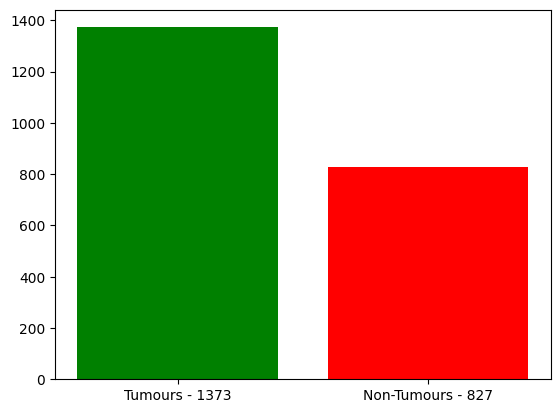

In [11]:
# to visualize the amount of tumours and non-tumours in the dataset
n_tumours = tumour_count.count("1")
n_nontumours = tumour_count.count("0")

print("Tumours: " + str(n_tumours), "...........", "Non-Tumours: " + str(n_nontumours))

plt.bar(["Tumours - " + str(n_tumours), "Non-Tumours - " + str(n_nontumours)], [n_tumours, n_nontumours], color=["green", "red"])

In [12]:
# importing libraries
import torch
import torchvision
from torchvision.transforms import transforms

In [13]:
# finding mean and standard deviation for the dataset
num_pixels = len(image_files)*256*256 #total number of pixels in our dataset

total_sum = 0
for data in image_files:
  image = cv2.imread(data)
  image = torch.from_numpy(image)
  total_sum += image[0].sum() #sum of the current batch of images

mean = total_sum/num_pixels


# std calculated with formula
sum_squared_error = 0
for data in image_files:
  image = cv2.imread(data)
  image = torch.from_numpy(image)
  sum_squared_error += ((image[0] - mean)**2).sum() #adding up the difference between all the elements in the batch and the mean

std = torch.sqrt(sum_squared_error/num_pixels) # only one element tensors can be converted to Python scalars, so use torch.sqrt instead of math.sqrt

print("Mean:", mean)
print("Standard Deviation:", std)

Mean: tensor(0.0222)
Standard Deviation: tensor(1.1787)


In [14]:
image_data = []
mask_data = []

# files are file paths, dataset is empty list that you will append the images too
def loading_data(files, dataset, actions):
  for data in files:
    # reading the image/mask
    image = cv2.imread(data) #makes it a numpy array

    # resizing the image/mask
    image = cv2.resize(image, (96, 96))
    # before, I flattened it and it changed a lot because, after the transformations, the tensor changes its composition when rotating or flipping
    # so when setting it to 256x256 again after, there's a weird result

    # convert the PIL image into a PyTorch tensor, cast the int8 values to float32, normalize
    if actions == True: # images
      transform = torchvision.transforms.Compose([transforms.ToTensor(),
                                                  transforms.ConvertImageDtype(torch.float),
                                                  transforms.Normalize((mean, mean, mean), (std, std, std))])
      image = transform(image)

    elif actions == False: # masks
      transform = torchvision.transforms.Compose([transforms.ToTensor(), transforms.ConvertImageDtype(torch.float), transforms.Grayscale()])
      image = transform(image)

    # no blurs needed because the edges need to be clear and precise

    dataset.append(image)

In [15]:
loading_data(image_files, image_data, True)

In [16]:
loading_data(mask_files, mask_data, False)

In [17]:
# when you run it again and again, change in #s for training data because it adds on

print(len(image_data), len(mask_data))

# split dataset into training, validation, and testing
len_trdataset = int(np.floor(len(image_data) * 0.60))
len_vtdataset = (len(image_data)-len_trdataset)//2

trimage_data = image_data[:len_trdataset]
trmask_data = mask_data[:len_trdataset]

vimage_data = image_data[len_trdataset:(len_trdataset+len_vtdataset)]
vmask_data = mask_data[len_trdataset:(len_trdataset+len_vtdataset)]

testimage_data = image_data[(len_trdataset+len_vtdataset):]
testmask_data = mask_data[(len_trdataset+len_vtdataset):]

print(str(len(trimage_data)), "----", str(len(vimage_data)), "----", str(len(testimage_data)))

2200 2200
1320 ---- 440 ---- 440


In [18]:
# the normalize function usually goes after data augmentation, but since only the positions of the pixels are changing (when flipping/rotating), it's not a problem

def data_augmentation(dataset): # adding modifications of original images to the dataset
  count = 0
  for image in dataset:
    # since the image is in a tensor, you can use torchvision's transforms
    # list of data augmentation commands
    if count % 9 == 0:
      # 90 degree clockwise rotation
      transform0 = transforms.RandomRotation(degrees=[90,90])
      image = transform0(image)
      dataset.append(image)

    elif count % 9 == 1:
      # vertical flip
      transform1 = transforms.RandomVerticalFlip(p=1)
      image = transform1(image)
      dataset.append(image)

    elif count % 9 == 2:
      # horizontal flip
      transform2 = transforms.RandomHorizontalFlip(p=1)
      image = transform2(image)
      dataset.append(image)

    count += 1

In [19]:
print(len(trimage_data))
print(len(trmask_data))

# data augmentation
data_augmentation(trimage_data)
data_augmentation(trmask_data)

# print statements to ensure that data augmentation worked
print(len(trimage_data))
print(len(trmask_data))

1320
1320
1980
1980


In [20]:
from torchvision import utils

# instead of making a classs to retrieve the data, you can zip the images and the masks, make that a tuple, and use that data for the dataloader
training_data = list(zip(trimage_data, trmask_data))
validation_data = list(zip(vimage_data, vmask_data))
testing_data = list(zip(testimage_data, testmask_data))

trainloader = torch.utils.data.DataLoader(training_data, batch_size=64, shuffle=True)
validationloader = torch.utils.data.DataLoader(validation_data, batch_size=64, shuffle=True)
testingloader = torch.utils.data.DataLoader(testing_data, batch_size=64, shuffle=True)

TEST:
torch.Size([64, 96, 96, 3])
torch.Size([64, 96, 96])
Images:


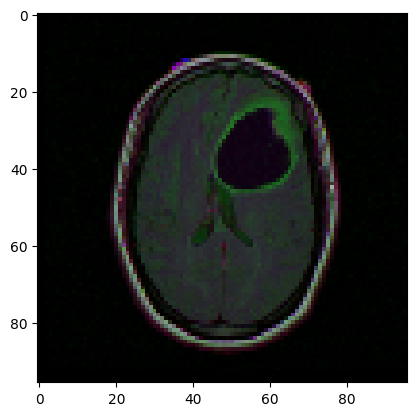

Masks:


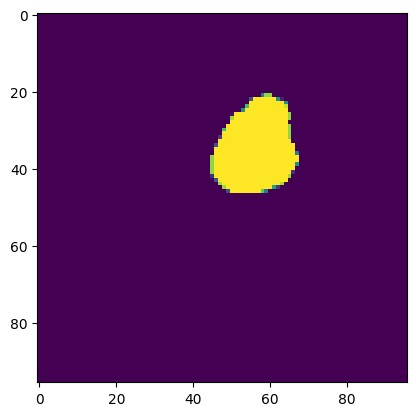



TRAIN:
torch.Size([64, 96, 96, 3])
torch.Size([64, 96, 96])
Images:


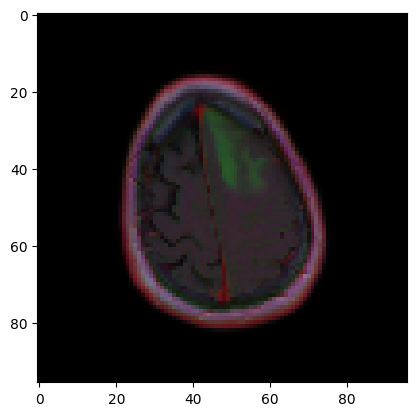

Masks:




TEST:
torch.Size([64, 96, 96, 3])
torch.Size([64, 96, 96])
Images:


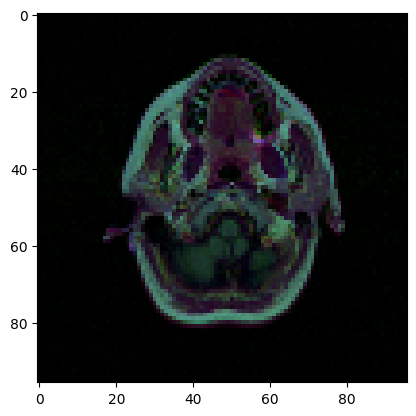

Masks:


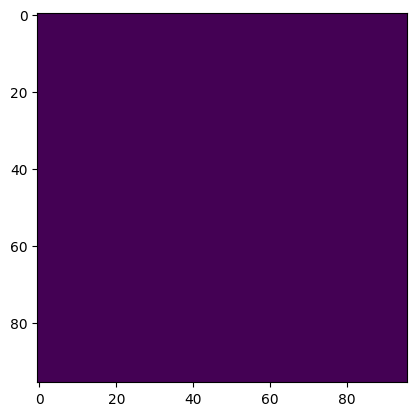

In [21]:
# testing data
trimages, trmasks = next(iter(trainloader))

trimages = trimages.permute((0,2,3,1))
trmasks = trmasks.permute((0,2,3,1))
trmasks = trmasks.squeeze()

print("TEST:")
print(trimages.shape)
print(trmasks.shape) # greyscaled

print("Images:")
plt.imshow(trimages[3])
plt.show()
print("Masks:")
plt.imshow(trmasks[3])
plt.show()

print("\n")

# validation data
vimages, vmasks = next(iter(validationloader))

vimages = vimages.permute((0,2,3,1))
vmasks = vmasks.permute((0,2,3,1))
vmasks = vmasks.squeeze()

print("TRAIN:")
print(vimages.shape)
print(vmasks.shape) # greyscaled

print("Images:")
plt.imshow(vimages[1])
plt.show()
print("Masks:")
plt.imshow(vmasks[1])
plt.show()

print("\n")

# testing data
testimages, testmasks = next(iter(testingloader))

testimages = testimages.permute((0,2,3,1))
testmasks = testmasks.permute((0,2,3,1))
testmasks = testmasks.squeeze()

print("TEST:")
print(testimages.shape)
print(testmasks.shape) # greyscaled

print("Images:")
plt.imshow(testimages[0])
plt.show()
print("Masks:")
plt.imshow(testmasks[0])
plt.show()

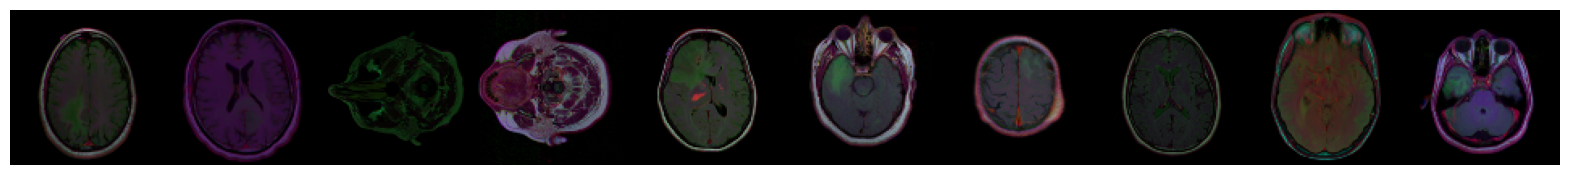

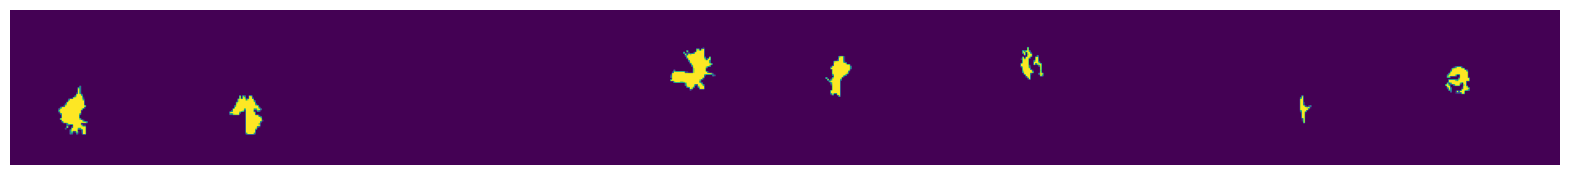

In [22]:
# visualize the images
def show_aug(loader, nrows=4, ncols=10):

    images, masks = next(iter(loader))
    images = images.permute((0,2,3,1))
    masks = masks.permute((0,2,3,1))
    masks = masks.squeeze()

    plt.figure(figsize=(20, 20))
    for i in range(len(images[:10])):
      plt.subplot(nrows, ncols, i+1)
      plt.imshow(images[i])
      plt.axis('off')
      plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

    plt.figure(figsize=(20, 20))
    for j in range(len(masks[:10])):
      plt.subplot(nrows, ncols, j+1)
      plt.imshow(masks[j])
      plt.axis('off')
      plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

show_aug(trainloader)

#Benchmarking


Train model code that suits all of Unet LinkNet Fuzzy C Kmeans for training them with our dataset

##U-net

Epoch 1/25, Loss: 0.3235421377804972
Validation Loss: 0.25537226455552237
Epoch 2/25, Loss: 0.1597982541688027
Validation Loss: 0.13103651787553514
Epoch 3/25, Loss: 0.09822990096384479
Validation Loss: 0.0847748528633799
Epoch 4/25, Loss: 0.07096123058469064
Validation Loss: 0.08181722036429814
Epoch 5/25, Loss: 0.054985606381970066
Validation Loss: 0.062059838856969564
Epoch 6/25, Loss: 0.04541000892077723
Validation Loss: 0.04273183111633573
Epoch 7/25, Loss: 0.03917537070810795
Validation Loss: 0.03569796787840979
Epoch 8/25, Loss: 0.03352501417600339
Validation Loss: 0.03291367127427033
Epoch 9/25, Loss: 0.030017277586363977
Validation Loss: 0.030553975807768956
Epoch 10/25, Loss: 0.02796780558363084
Validation Loss: 0.03969606491071837
Epoch 11/25, Loss: 0.02445449397688912
Validation Loss: 0.039729860478213856
Epoch 12/25, Loss: 0.02230946647544061
Validation Loss: 0.027588306260960444
Epoch 13/25, Loss: 0.02015770509118034
Validation Loss: 0.023980301405702318
Epoch 14/25, Loss

Validation Loss: 0.01676861915205206


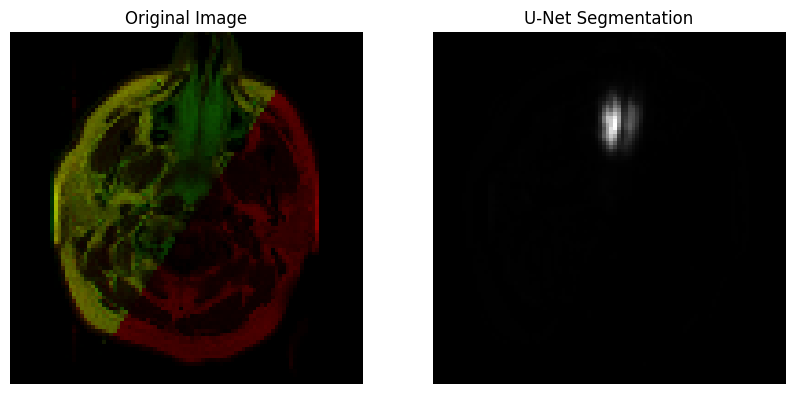

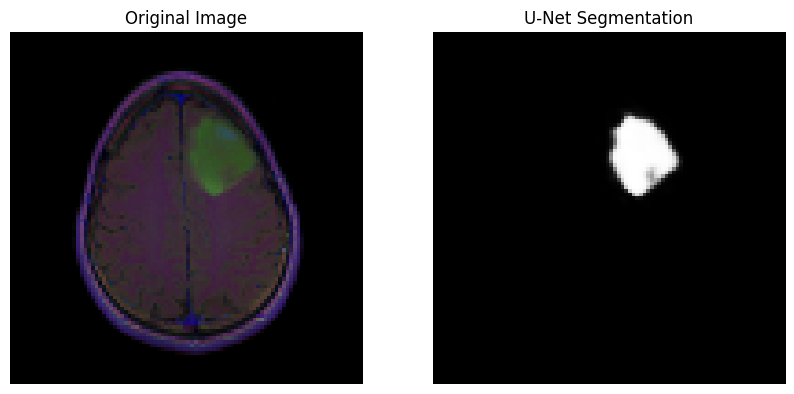

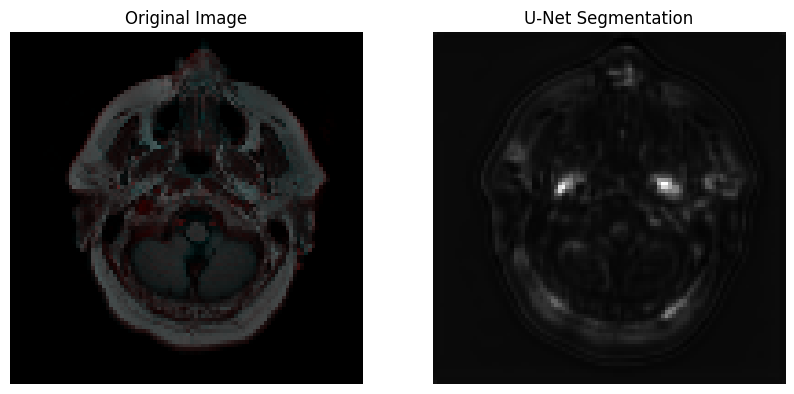

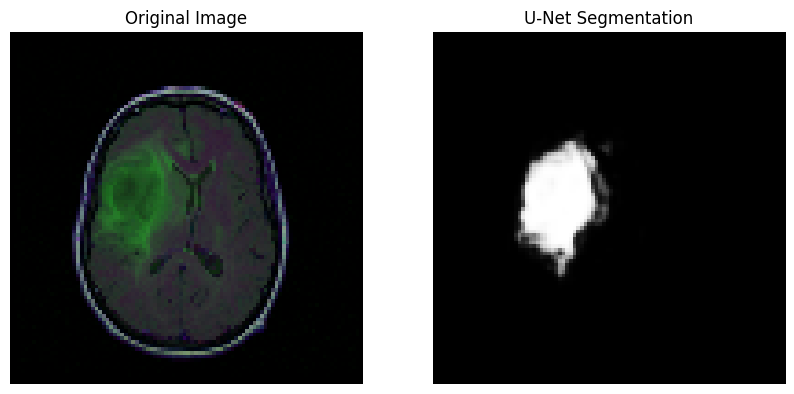

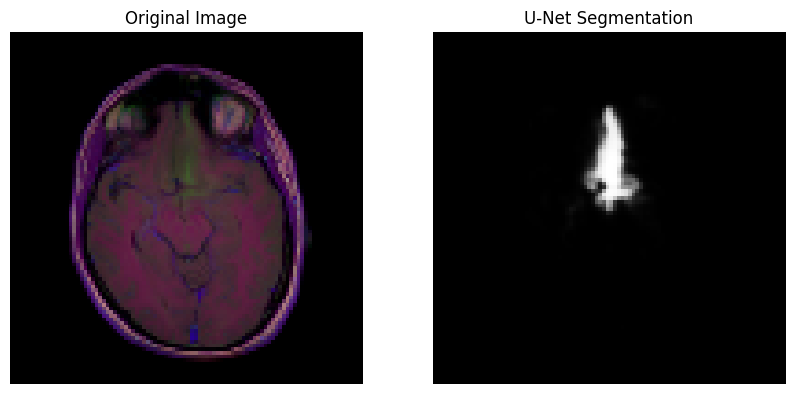

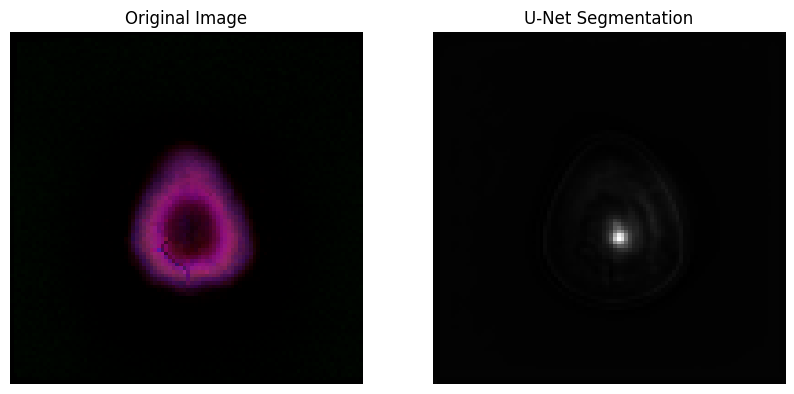

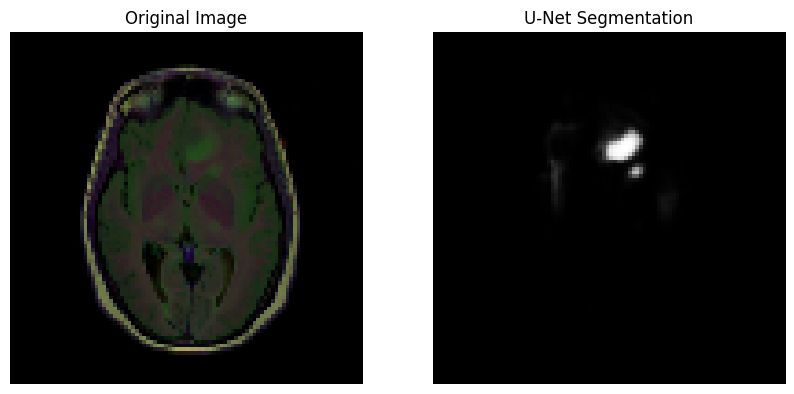

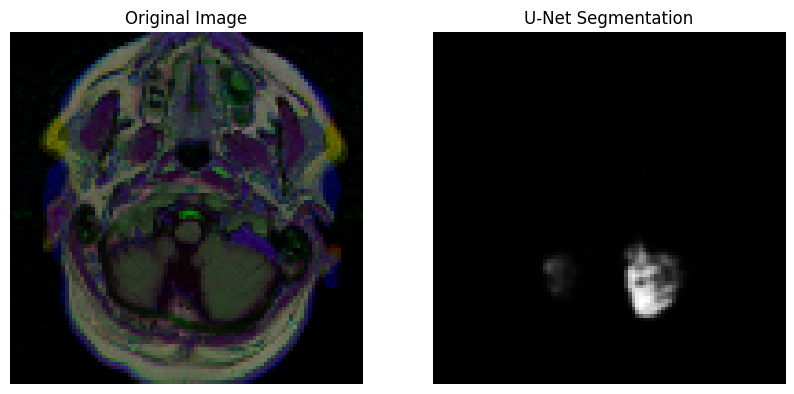

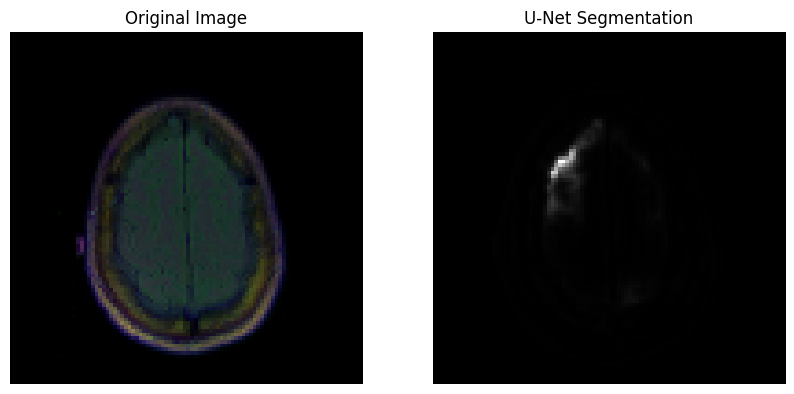

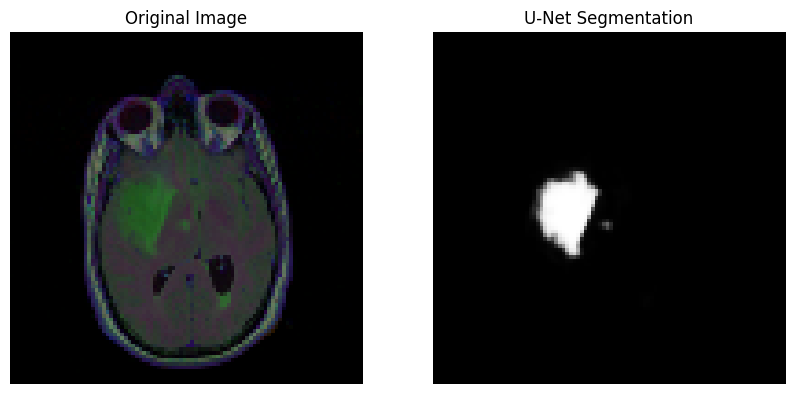

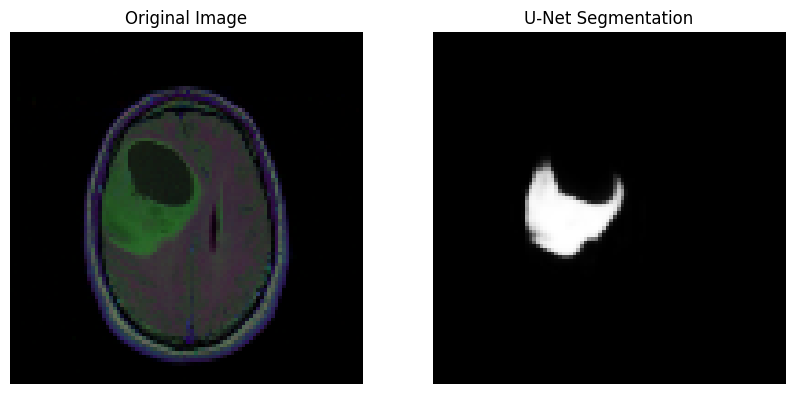

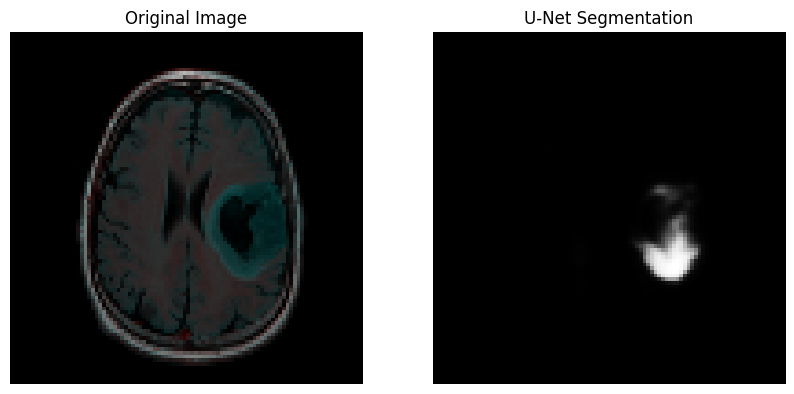

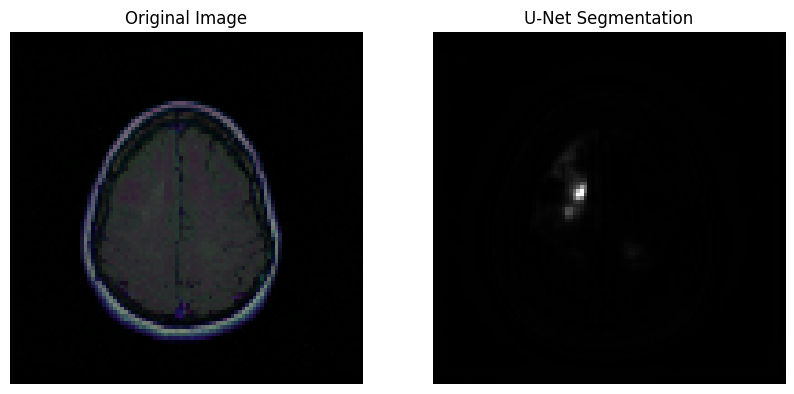

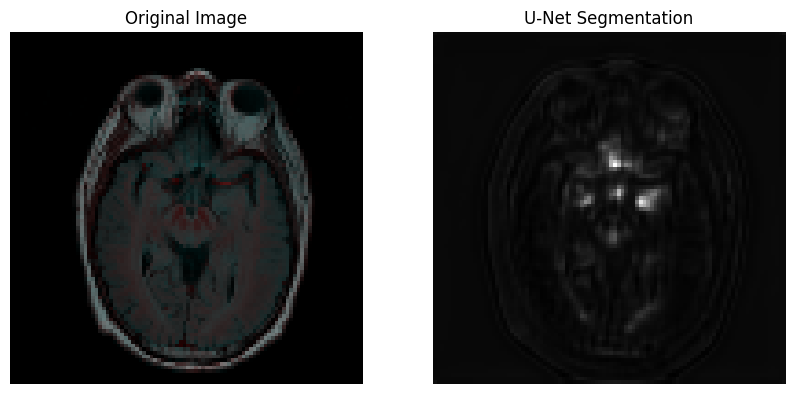

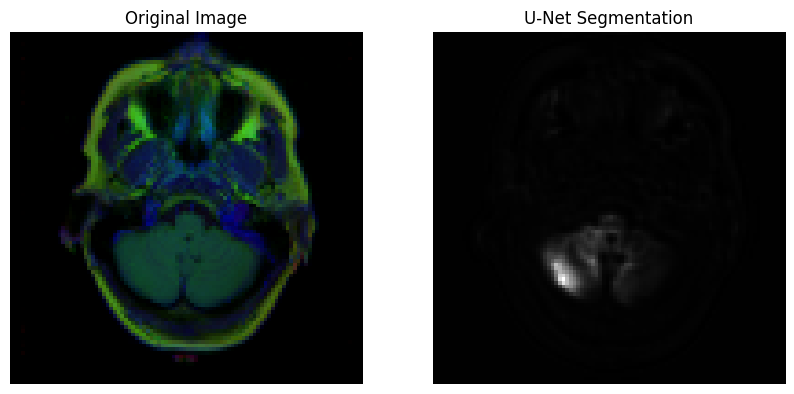

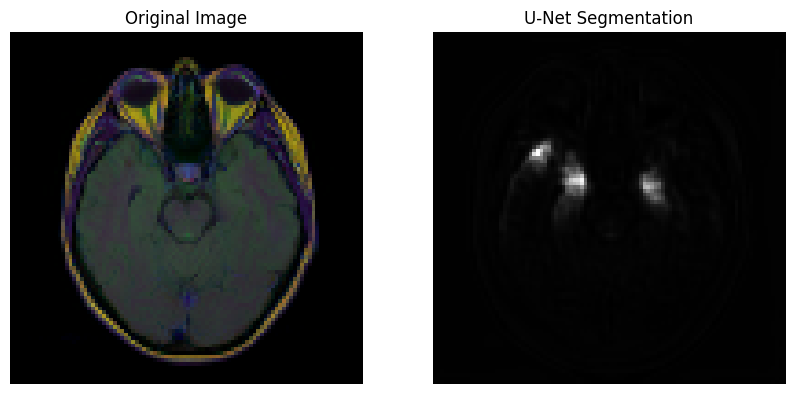

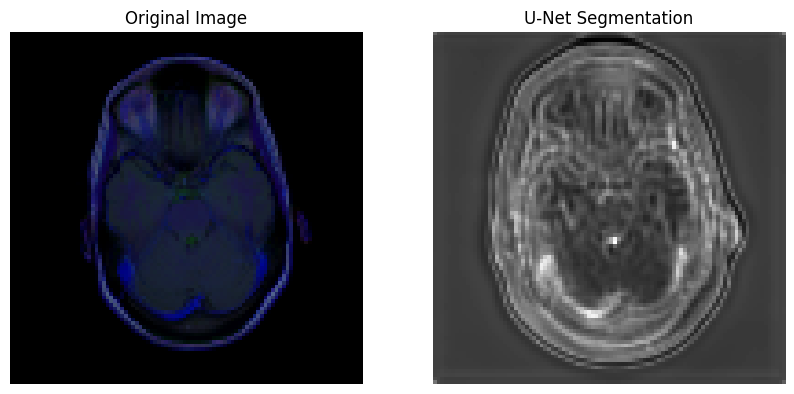

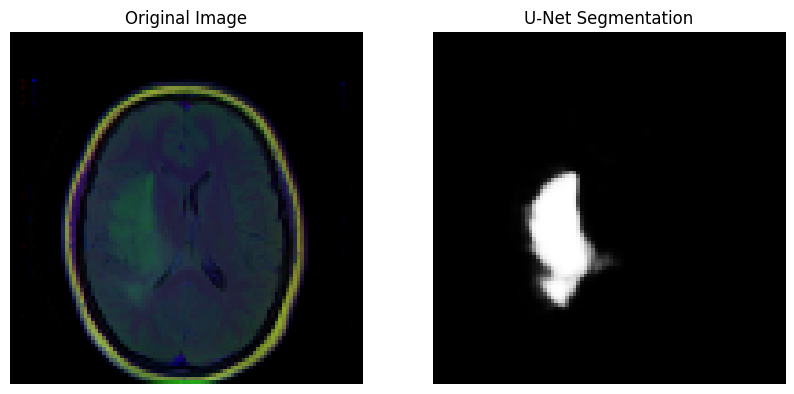

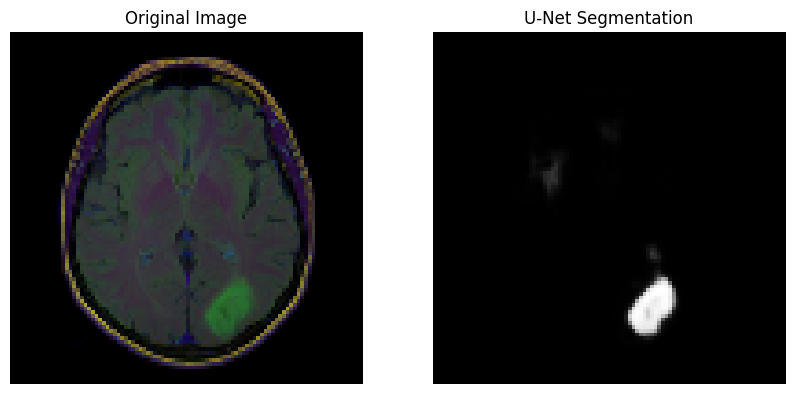

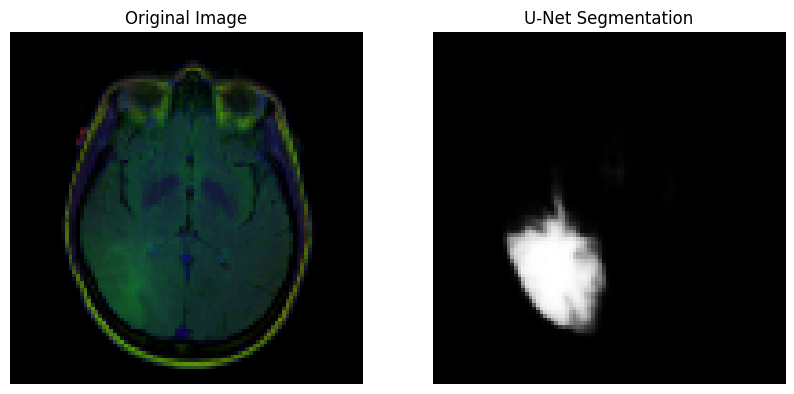

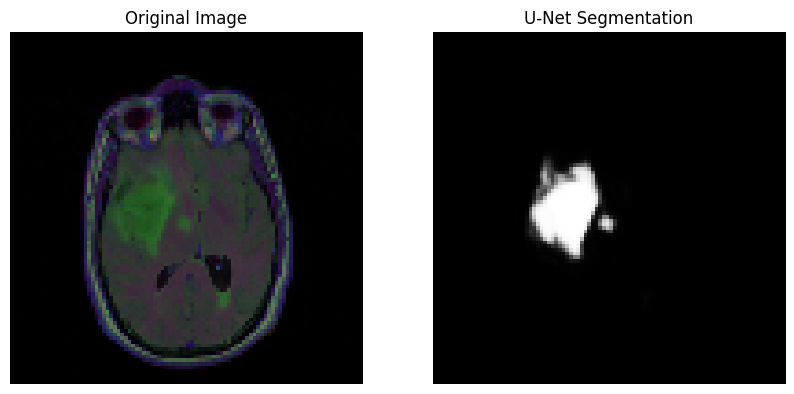

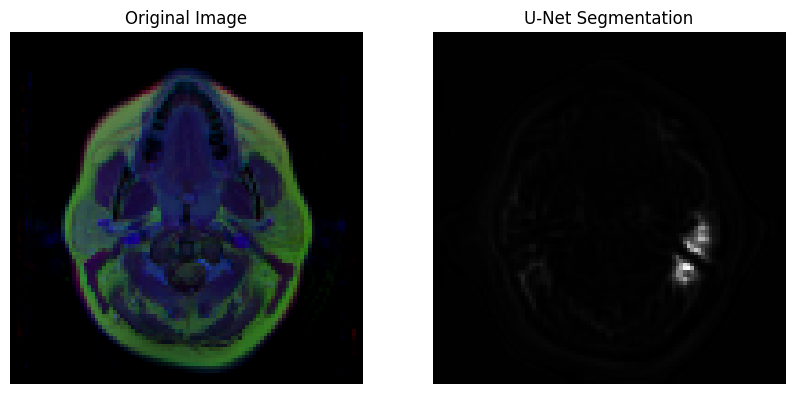

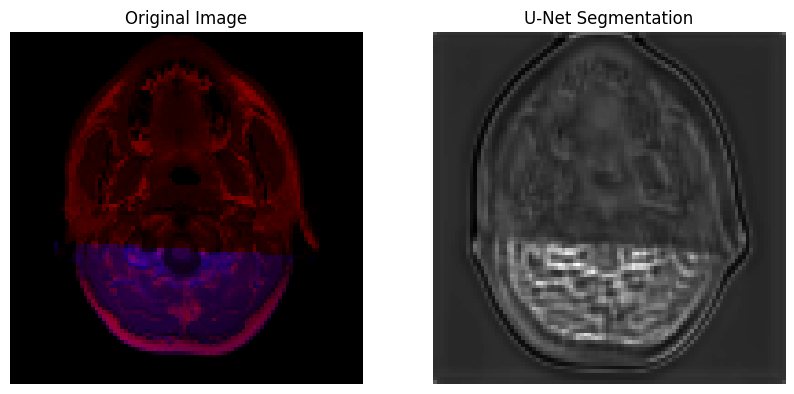

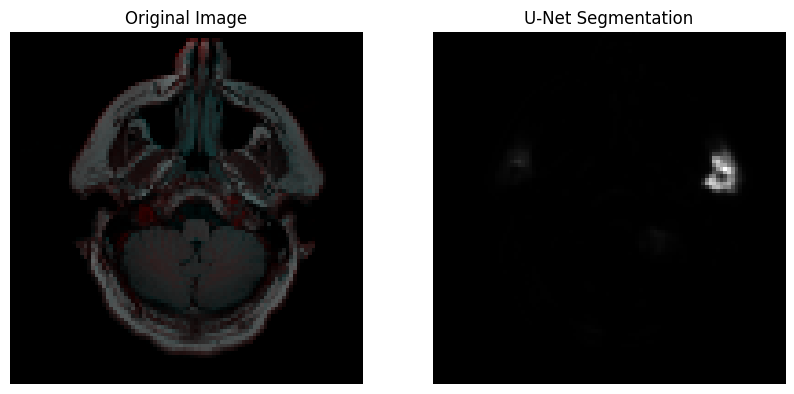

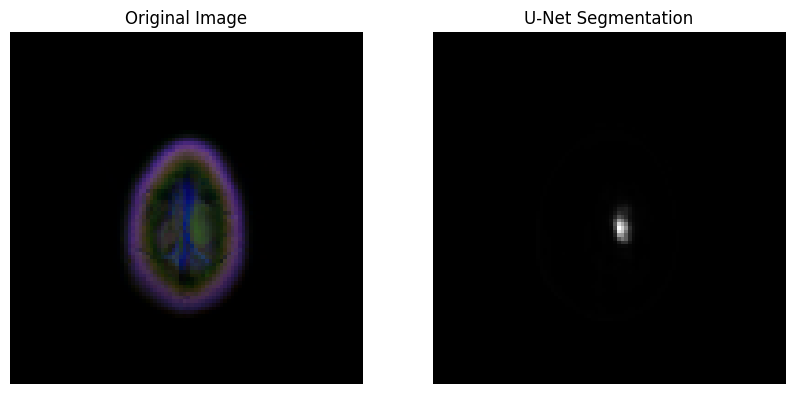

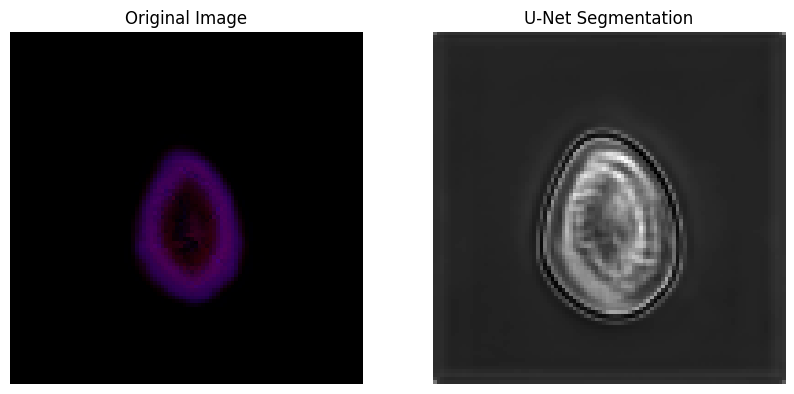

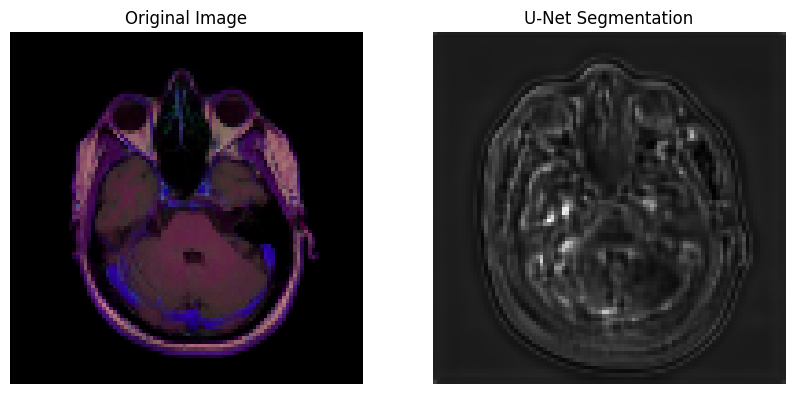

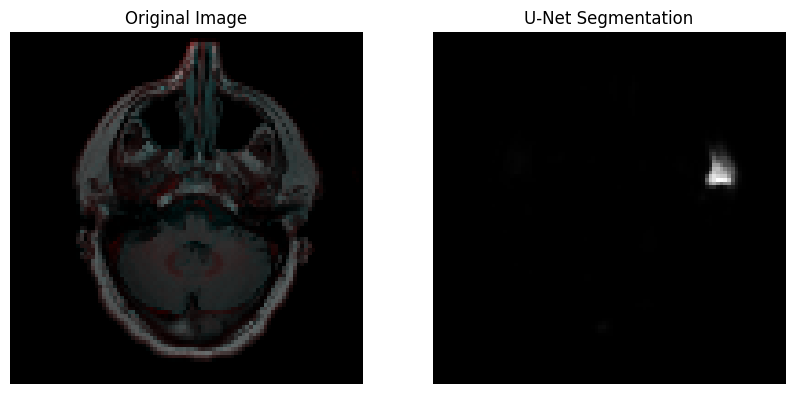

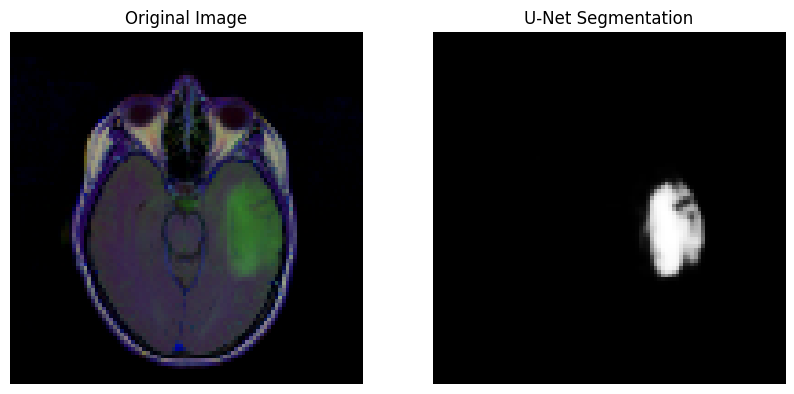

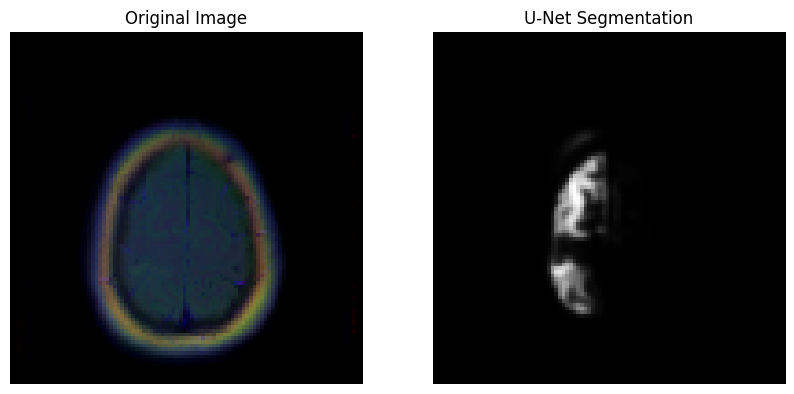

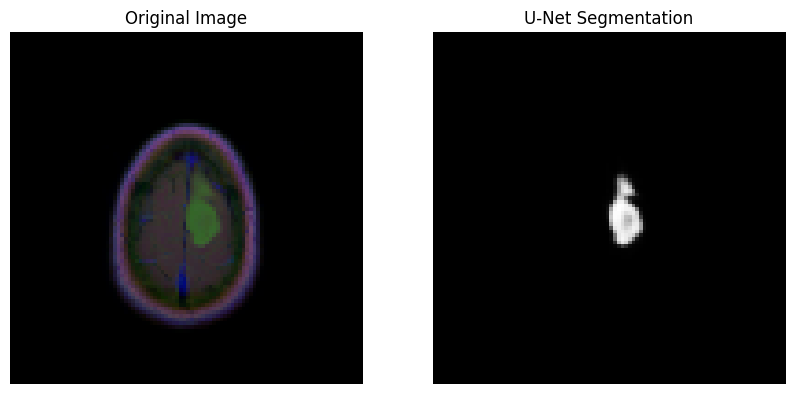

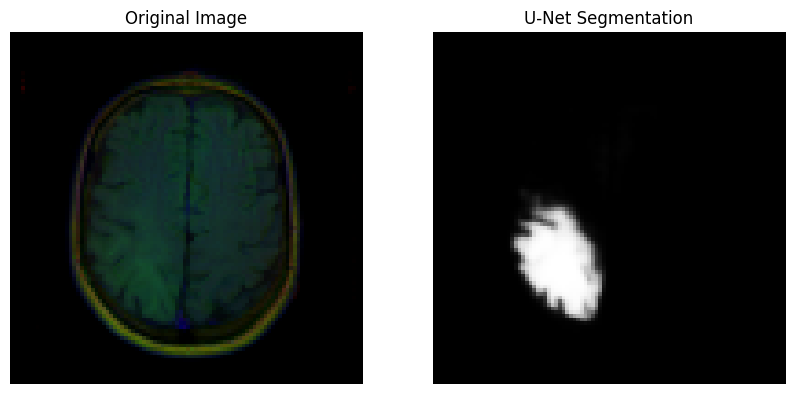

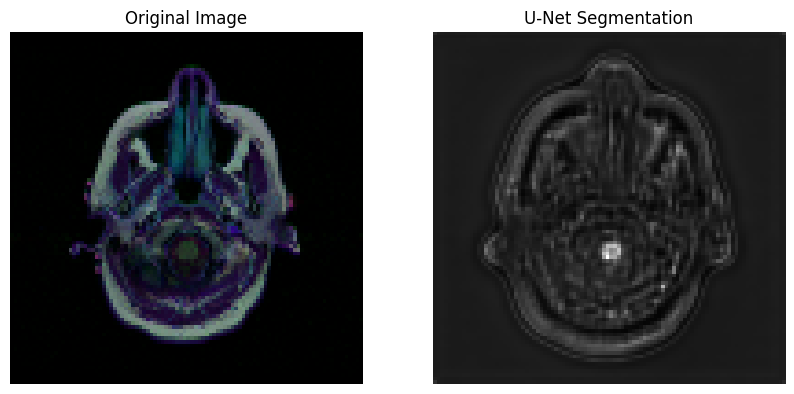

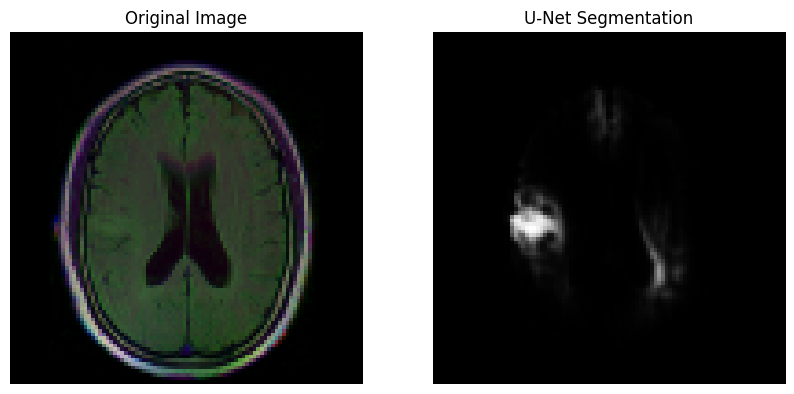

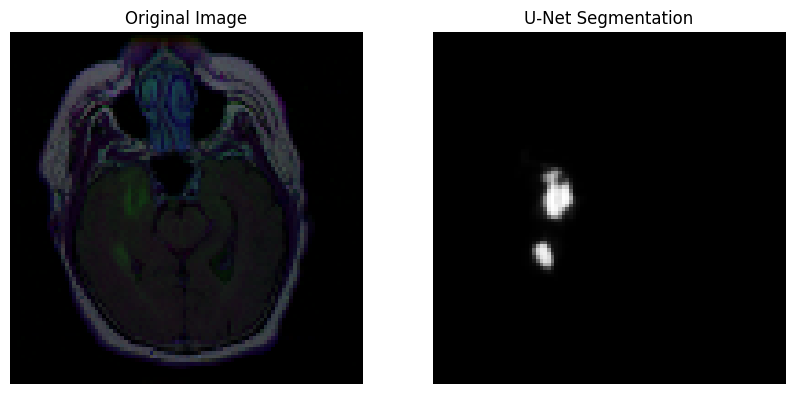

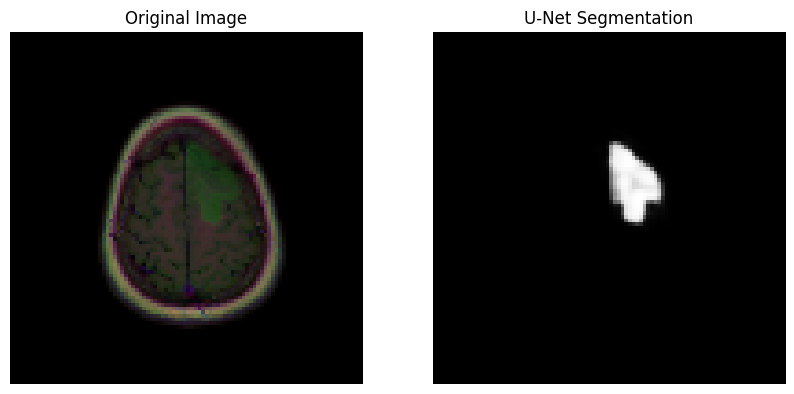

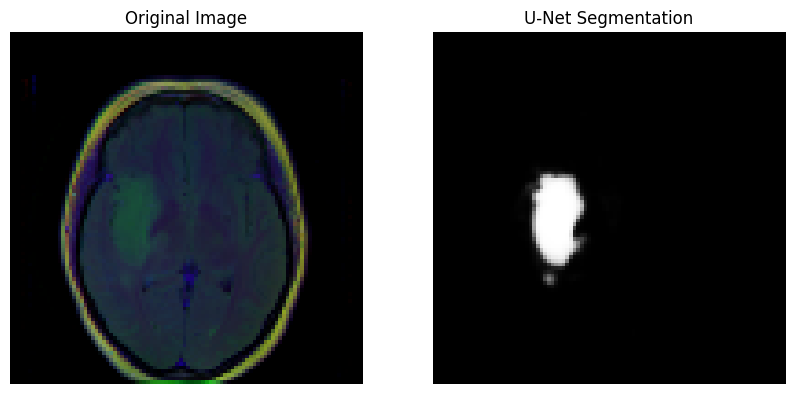

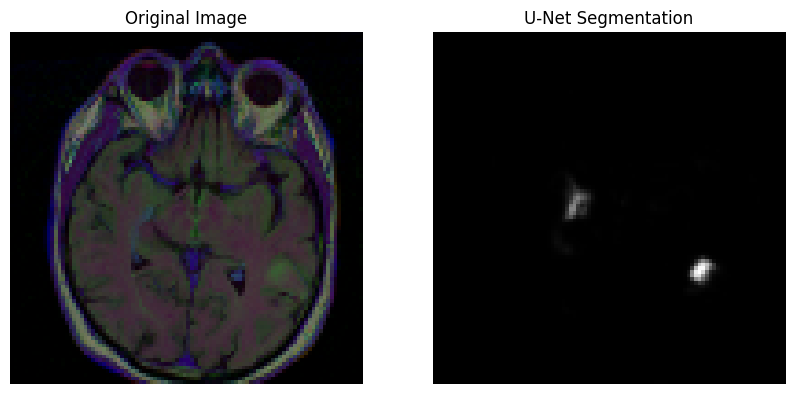

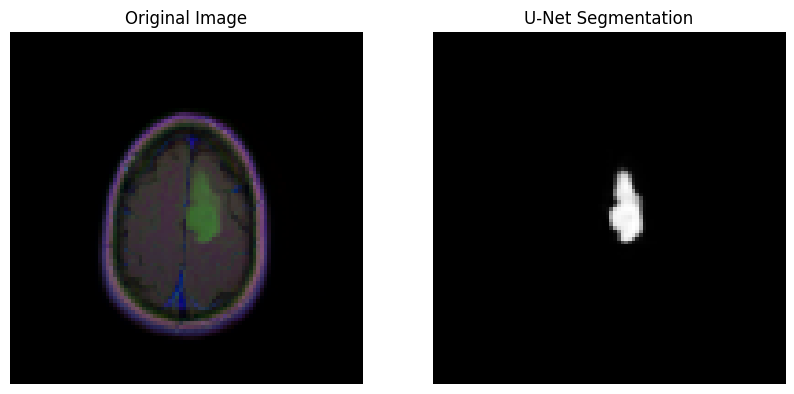

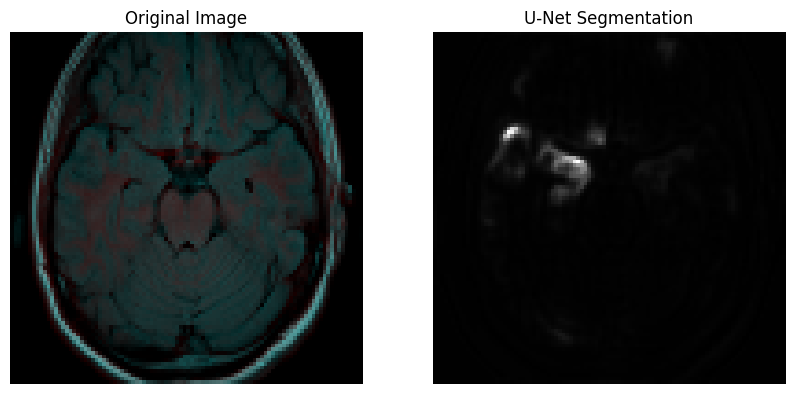

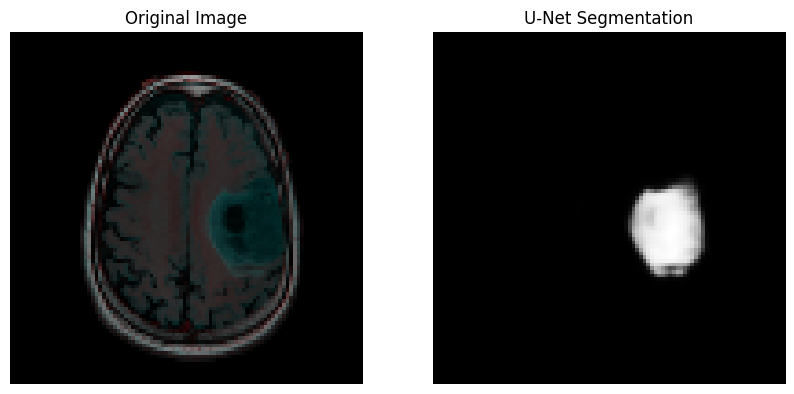

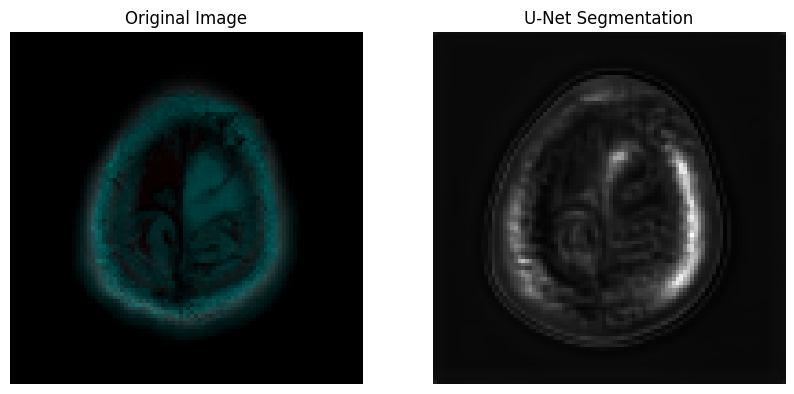

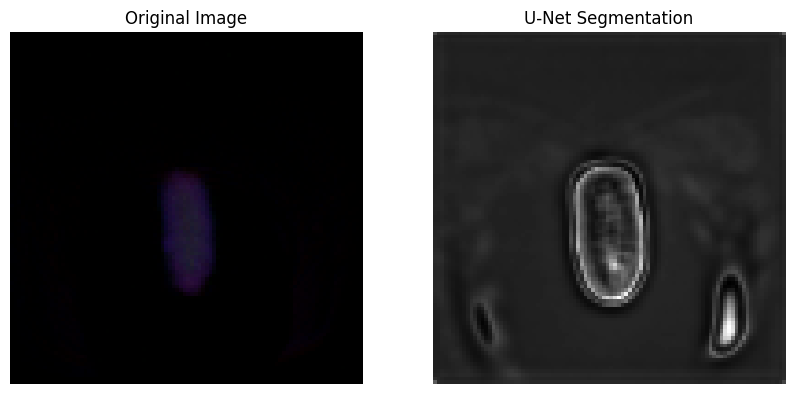

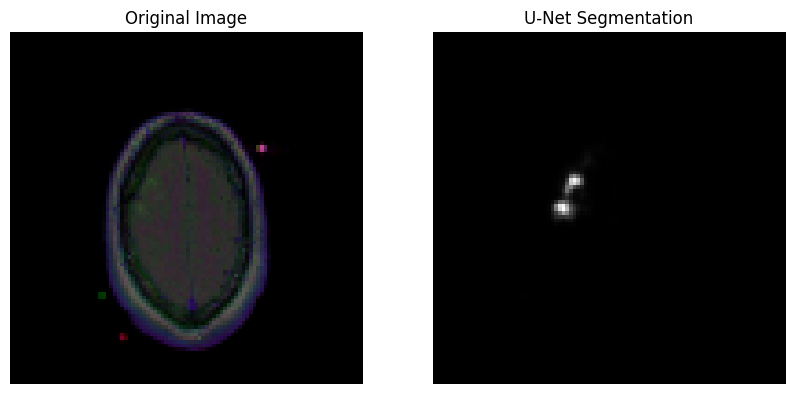

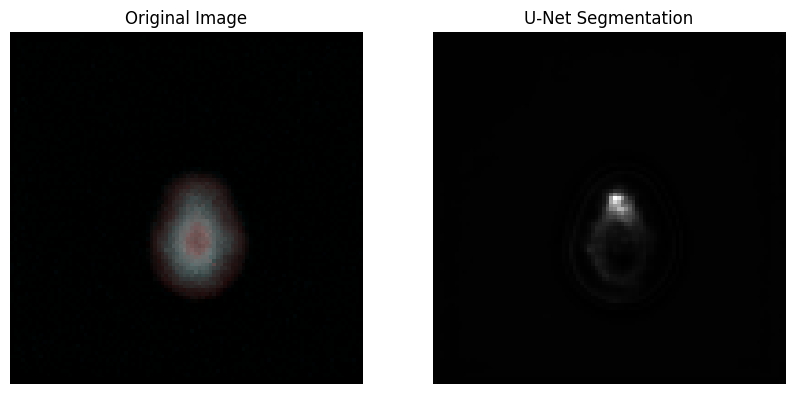

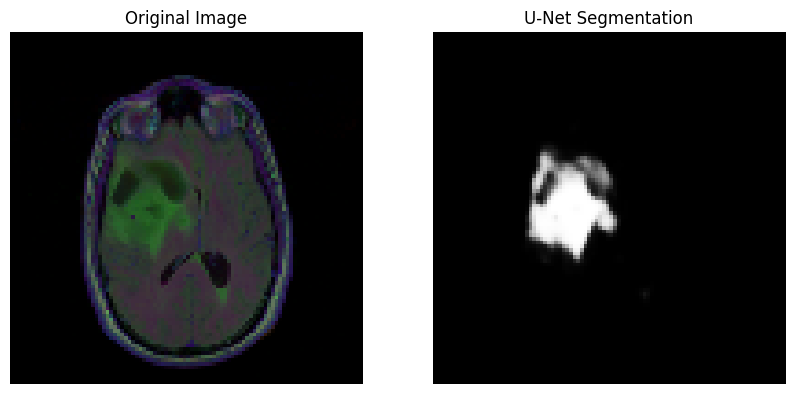

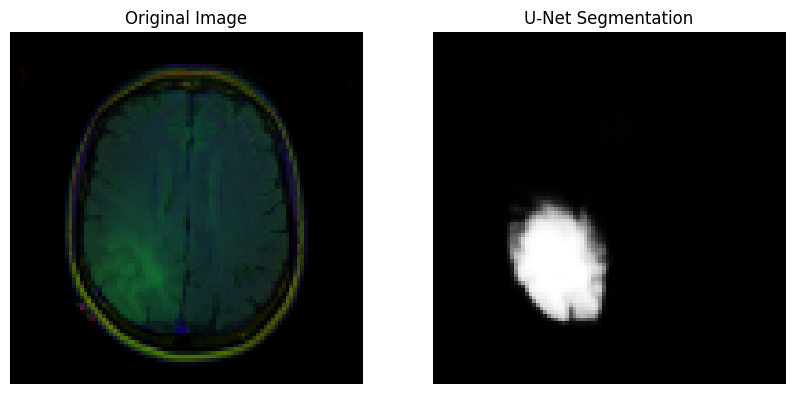

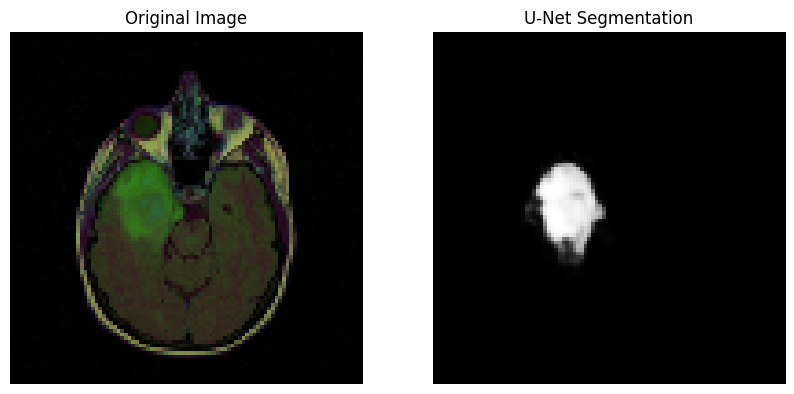

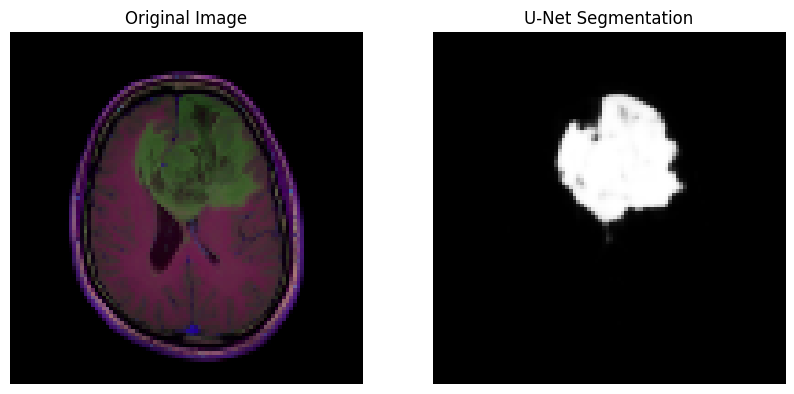

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class UNet(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.inc = inconv(n_channels, 64)
        self.down1 = down(64, 128)
        self.down2 = down(128, 256)
        self.down3 = down(256, 512)
        self.down4 = down(512, 512)
        self.up1 = up(1024, 256)
        self.up2 = up(512, 128)
        self.up3 = up(256, 64)
        self.up4 = up(128, 64)
        self.outc = outconv(64, n_classes)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        x = self.outc(x)
        return torch.sigmoid(x)

class inconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(inconv, self).__init__()
        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x):
        x = self.conv(x)
        return x

class double_conv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(double_conv, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_ch, out_ch, 3, padding=1),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.conv(x)
        return x

class down(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(down, self).__init__()
        self.mpconv = nn.Sequential(
            nn.MaxPool2d(2),
            double_conv(in_ch, out_ch)
        )

    def forward(self, x):
        x = self.mpconv(x)
        return x

class up(nn.Module):
    def __init__(self, in_ch, out_ch, bilinear=True):
        super(up, self).__init__()
        if bilinear:
            self.up = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)
        else:
            self.up = nn.ConvTranspose2d(in_ch // 2, in_ch // 2, 2, stride=2)

        self.conv = double_conv(in_ch, out_ch)

    def forward(self, x1, x2):
        x1 = self.up(x1)
        diffY = x2.size()[2] - x1.size()[2]
        diffX = x2.size()[3] - x1.size()[3]

        x1 = F.pad(x1, [diffX // 2, diffX - diffX // 2,
                        diffY // 2, diffY - diffY // 2])
        x = torch.cat([x2, x1], dim=1)
        x = self.conv(x)
        return x

class outconv(nn.Module):
    def __init__(self, in_ch, out_ch):
        super(outconv, self).__init__()
        self.conv = nn.Conv2d(in_ch, out_ch, 1)

    def forward(self, x):
        x = self.conv(x)
        return x

# Training the U-Net Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = UNet(n_channels=3, n_classes=1).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 25
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, masks in trainloader:
        images, masks = images.to(device), masks.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(trainloader)}')

    # Validation step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, masks in validationloader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            loss = criterion(outputs, masks)
            val_loss += loss.item()
    print(f'Validation Loss: {val_loss/len(validationloader)}')

def display_results(original, segmented, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(segmented, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()
# Displaying U-Net Segmentation Results
model.eval()
with torch.no_grad():
    for images, masks in testingloader:
        images = images.to(device)
        outputs = model(images)
        outputs = outputs.cpu().numpy()
        images = images.cpu().numpy()
        for i in range(len(images)):
            original_image = np.transpose(images[i], (1, 2, 0))
            segmented_image = outputs[i][0]
            display_results(original_image, segmented_image, 'U-Net Segmentation')
        break


In [24]:
import numpy as np
import torch
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score

def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = y_true.view(-1)
    y_pred_f = y_pred.view(-1)
    intersection = (y_true_f * y_pred_f).sum()
    return (2. * intersection + smooth) / (y_true_f.sum() + y_pred_f.sum() + smooth)

def evaluate_model(model, dataloader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, masks in dataloader:
            images, masks = images.to(device), masks.to(device)
            outputs = model(images)
            preds = (outputs > 0.5).float()  # Ensure predictions are binary
            masks = (masks > 0.5).float()    # Ensure masks are binary

            all_preds.append(preds.cpu().numpy().flatten())
            all_labels.append(masks.cpu().numpy().flatten())

    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    accuracy = (all_preds == all_labels).sum() / len(all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    iou = jaccard_score(all_labels, all_preds)
    dice = dice_coefficient(torch.tensor(all_labels), torch.tensor(all_preds))

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'IoU: {iou:.4f}')
    print(f'Dice Coefficient: {dice:.4f}')

    return accuracy, precision, recall, f1, iou, dice

# Assuming 'model' is your trained model and 'trainloader', 'validationloader', 'testingloader' are your data loaders
print
print("Training Metrics:")
train_metrics = evaluate_model(model, trainloader)
print("Validation Metrics:")
val_metrics = evaluate_model(model, validationloader)
print("Testing Metrics:")
test_metrics = evaluate_model(model, testingloader)


Training Metrics:
Accuracy: 0.9962
Precision: 0.9089
Recall: 0.8684
F1 Score: 0.8882
IoU: 0.7989
Dice Coefficient: 0.8882
Validation Metrics:
Accuracy: 0.9946
Precision: 0.9008
Recall: 0.8145
F1 Score: 0.8555
IoU: 0.7475
Dice Coefficient: 0.8555
Testing Metrics:
Accuracy: 0.9934
Precision: 0.8434
Recall: 0.8053
F1 Score: 0.8239
IoU: 0.7006
Dice Coefficient: 0.8239



##Fuzzy-C Means

In [25]:
!pip install scikit-fuzzy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=a59f9ad20ffac15eadc924805f99d8d92d7fbb394e4b579772a0ca43c2175326
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


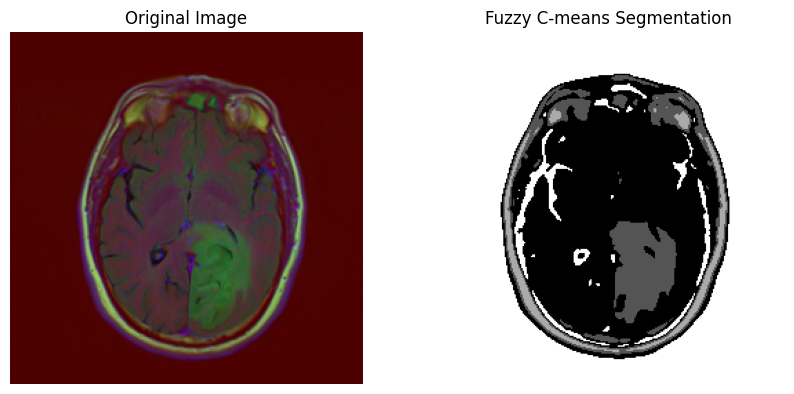

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz

def display_results(original, segmented, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(segmented, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def fuzzy_cmeans_segmentation(image, num_clusters=4):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(gray, (5, 5), 0) / 255.0
    pixel_values = image.reshape((-1, 1))

    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(pixel_values.T, num_clusters, 2, error=0.005, maxiter=1000, init=None)
    cluster_membership = np.argmax(u, axis=0)
    segmented_image = cluster_membership.reshape(gray.shape)
    return (segmented_image * 255 / num_clusters).astype(np.uint8)

def visualize_fuzzy_cmeans_segmentation(image):
    if image is None:
        print("Error: Image not loaded. Please check the file path.")
        return

    fuzzy_cmeans_seg = fuzzy_cmeans_segmentation(image)
    display_results(image, fuzzy_cmeans_seg, 'Fuzzy C-means Segmentation')

# Testing with a sample image
sample_image = cv2.imread(image_files[2])
visualize_fuzzy_cmeans_segmentation(sample_image)


In [28]:
import cv2
import numpy as np
import skfuzzy as fuzz
from sklearn.metrics import precision_score, recall_score, f1_score, jaccard_score
from concurrent.futures import ThreadPoolExecutor, as_completed

def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = (y_true_f * y_pred_f).sum()
    return (2. * intersection + smooth) / (y_true_f.sum() + y_pred_f.sum() + smooth)

def fuzzy_cmeans_segmentation(image, num_clusters=4):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.GaussianBlur(gray, (5, 5), 0) / 255.0
    pixel_values = image.reshape((-1, 1))

    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(pixel_values.T, num_clusters, 2, error=0.005, maxiter=1000, init=None)
    cluster_membership = np.argmax(u, axis=0)
    segmented_image = cluster_membership.reshape(gray.shape)
    return (segmented_image * 255 / (num_clusters - 1)).astype(np.uint8)

def process_image(image, mask, num_clusters):
    segmented_image = fuzzy_cmeans_segmentation(image, num_clusters)
    preds = (segmented_image > (255 / num_clusters)).astype(np.float32)
    labels = (mask > 0).astype(np.float32)
    return preds.flatten(), labels.flatten()

def evaluate_fuzzy_cmeans_segmentation(images, masks, num_clusters=4):
    all_preds = []
    all_labels = []

    with ThreadPoolExecutor() as executor:
        futures = [executor.submit(process_image, image, mask, num_clusters) for image, mask in zip(images, masks)]
        for future in as_completed(futures):
            preds, labels = future.result()
            all_preds.append(preds)
            all_labels.append(labels)

    all_preds = np.concatenate(all_preds)
    all_labels = np.concatenate(all_labels)

    accuracy = (all_preds == all_labels).sum() / len(all_preds)
    precision = precision_score(all_labels, all_preds)
    recall = recall_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds)
    iou = jaccard_score(all_labels, all_preds)
    dice = dice_coefficient(all_labels, all_preds)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'IoU: {iou:.4f}')
    print(f'Dice Coefficient: {dice:.4f}')

    return accuracy, precision, recall, f1, iou, dice

# Assuming 'image_files' and 'mask_files' contain paths to your images and masks respectively
# Load the images and masks for evaluation and resize to a manageable size (e.g., 128x128)
images = [cv2.resize(cv2.imread(img), (128, 128)) for img in image_files]
masks = [cv2.resize(cv2.imread(mask, 0), (128, 128)) for mask in mask_files]

print("Fuzzy C-means Segmentation Metrics:")
fuzzy_cmeans_metrics = evaluate_fuzzy_cmeans_segmentation(images, masks)


Fuzzy C-means Segmentation Metrics:
Accuracy: 0.2529
Precision: 0.0189
Recall: 0.7237
F1 Score: 0.0368
IoU: 0.0188
Dice Coefficient: 0.0368
